In [3]:
import numpy as np
import pandas as pd
from pathlib import Path


def plot(df, pivot, xlabel, ylabel, ltitle, title, folder):
    plt = None
    if pivot is None:
        plt = df.plot(kind='bar', title=title,
                      x=df.columns[0], y=df.columns[1], xlabel=xlabel, ylabel=ylabel, legend=False)
    else:
        plt = df.pivot(*pivot).plot(kind='bar', title=title,
                                    xlabel=xlabel, ylabel=ylabel)
        plt.legend(loc='upper left', ncol=5, prop={'size': 8}, title=ltitle)
    plt.figure.savefig(f'{folder}/{title}.png', bbox_inches="tight", dpi=300)


def extract(files, cols):
    dfs = []
    df_cols = []
    for f in files:
        _df = pd.read_csv(f, usecols=cols)
        dfs.append(_df)
        df_cols.append(_df[cols[-1]])
    df = dfs[0][cols[:-1]]
    df_col = pd.concat(df_cols).groupby(level=0).mean()
    df = pd.concat([df,df_col], axis=1)    
    return df


def display_results(benchmarks, results_folder, policy):
    for b in benchmarks:
        if 'sw4' in b or 'NPB' in b:
            cols = ['omp_threads', 'solve_time(seconds)']
            df = extract(Path(results_folder).glob(f'{b}*.csv'), cols)
            plot(df, None, 'No. of Threads', 'Solve Time (seconds)',
                 None, f'{b}-{policy}', results_folder)
        elif 'STREAM' in b:
            cols = ['omp_threads', 'function', 'bandwidth']
            pivot = ['function', 'omp_threads', 'bandwidth']
            df = extract(Path(results_folder).glob(f'{b}*.csv'), cols)
            plot(df, pivot, 'Function', 'Bandwidth',
                 'No. of OMP Threads', f'{b}-{policy}', results_folder)
        else:
            cols = ['omp_threads', 'size', 'solve_time(seconds)']
            pivot = ['size', 'omp_threads', 'solve_time(seconds)']
            df = extract(Path(results_folder).glob(f'{b}*.csv'), cols)
            plot(df, pivot, 'Workload Size', 'Solve Time (seconds)',
                 'No. of OMP Threads', f'{b}-{policy}', results_folder)


/home/velu585/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


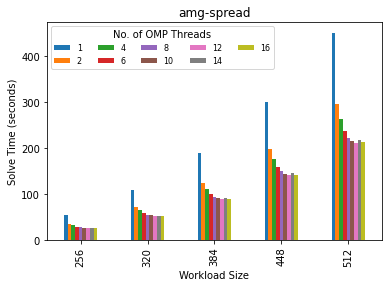

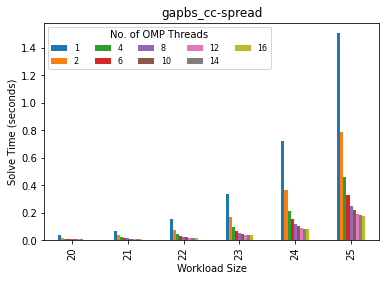

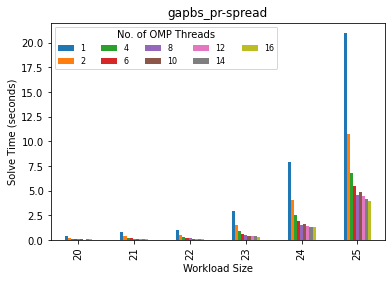

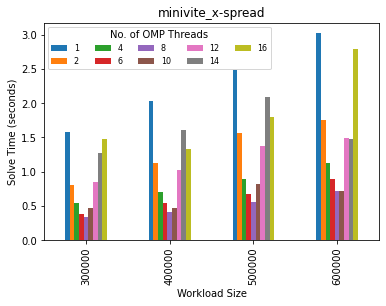

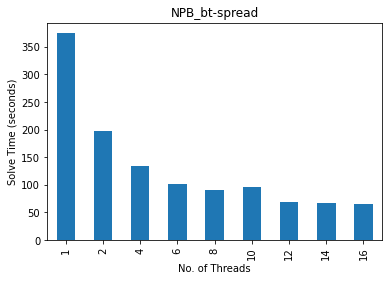

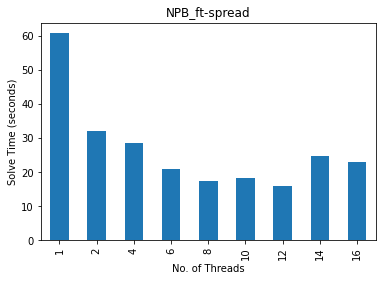

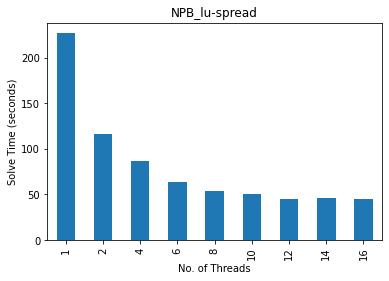

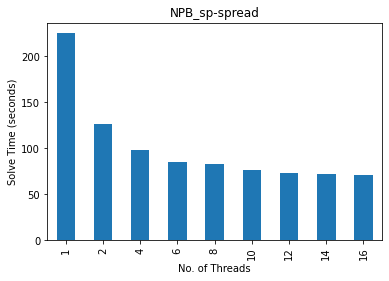

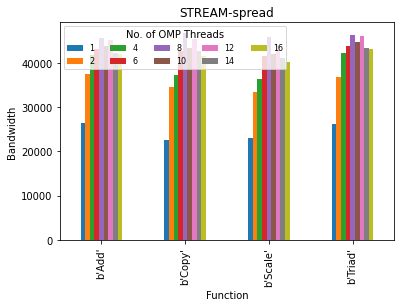

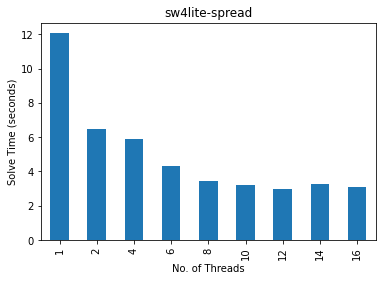

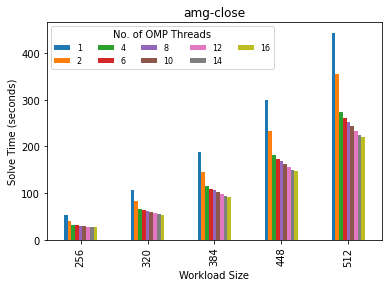

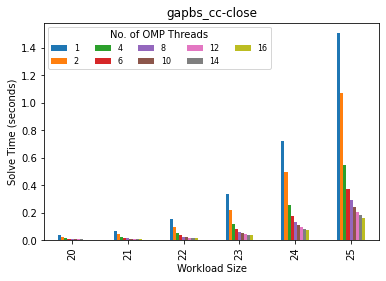

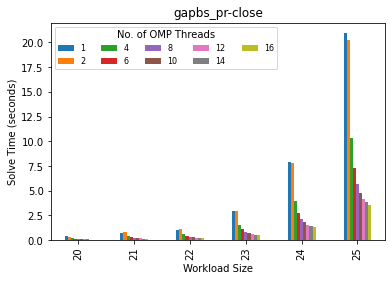

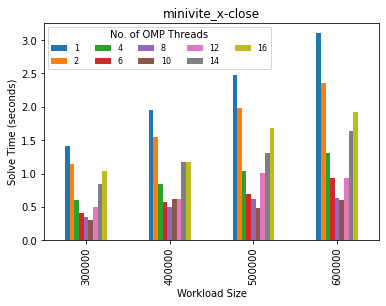

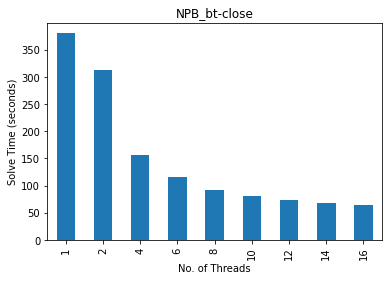

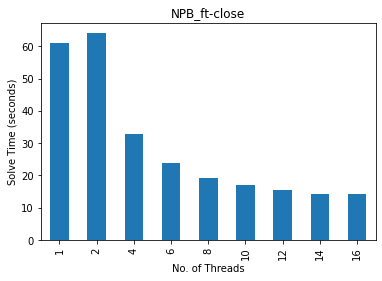

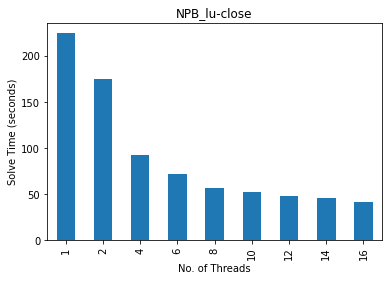

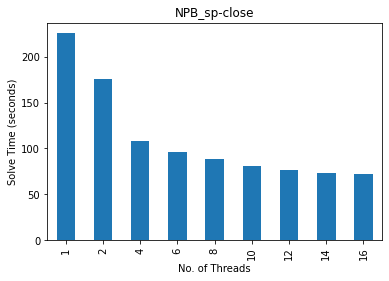

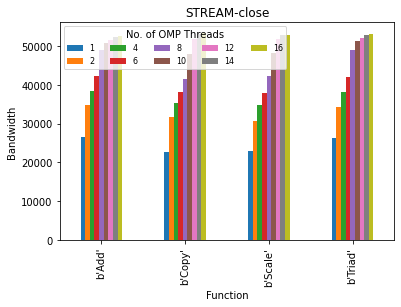

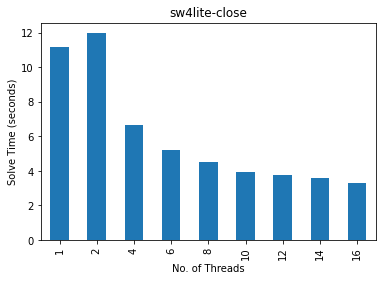

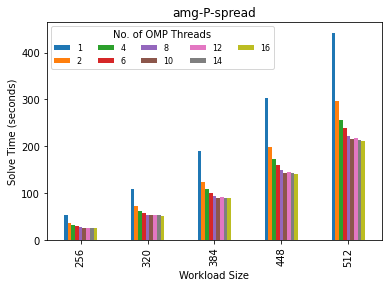

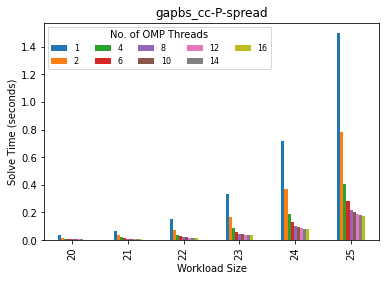

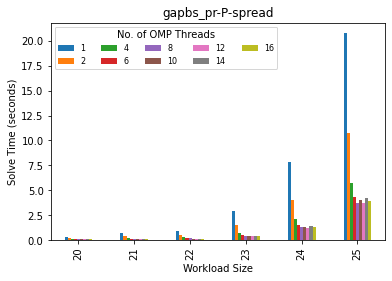

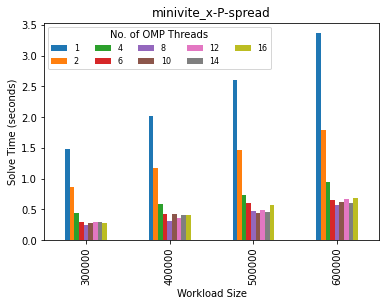

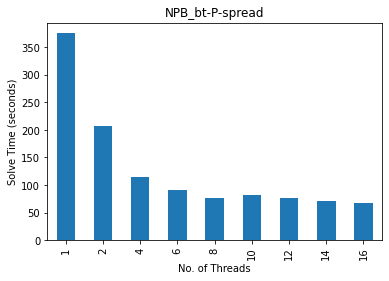

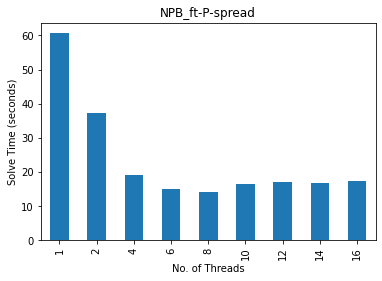

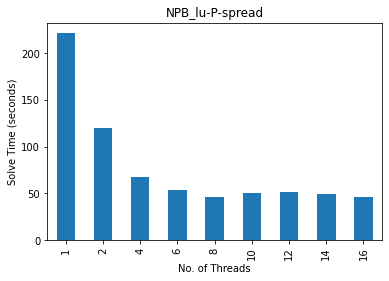

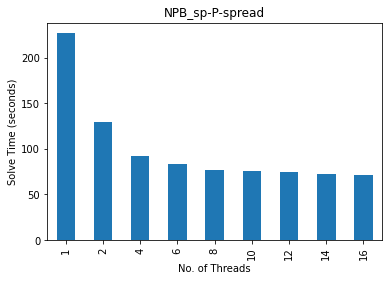

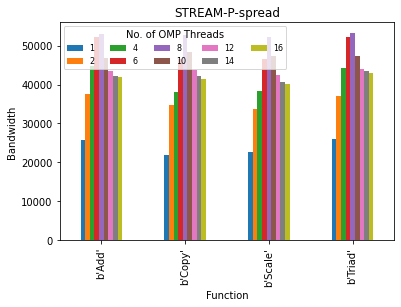

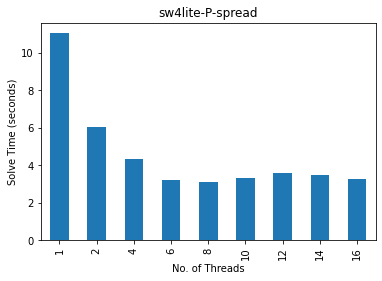

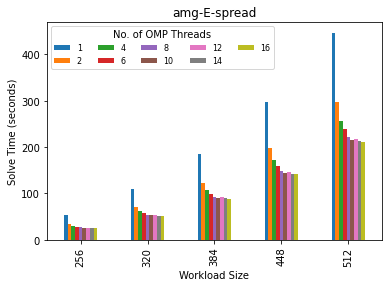

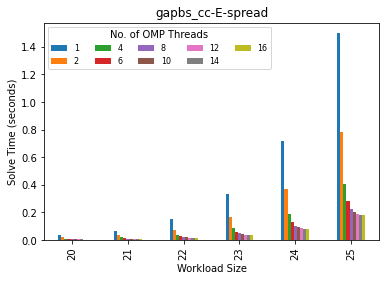

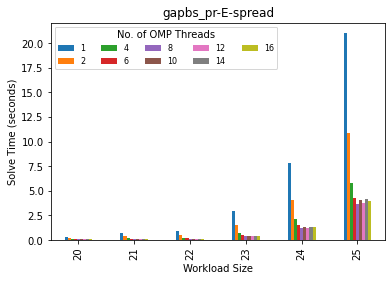

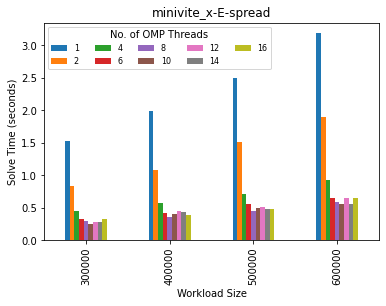

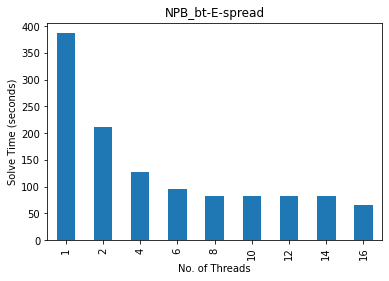

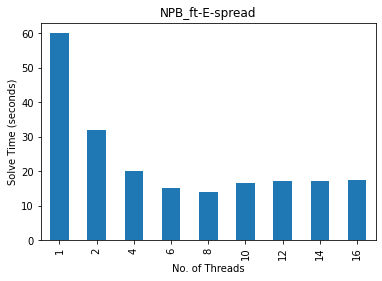

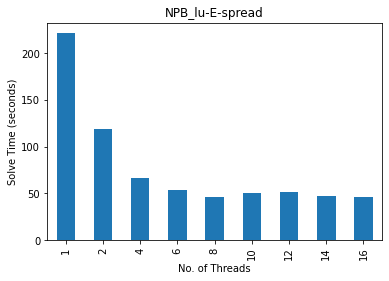

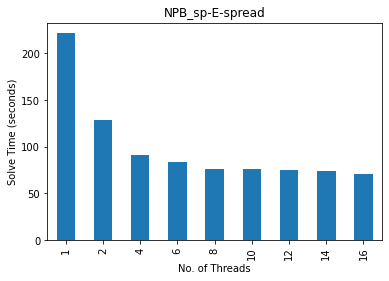

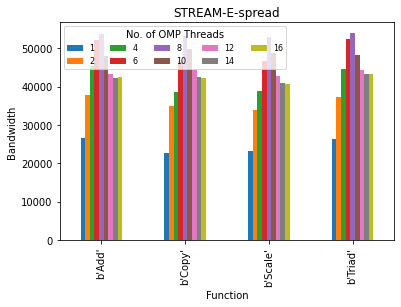

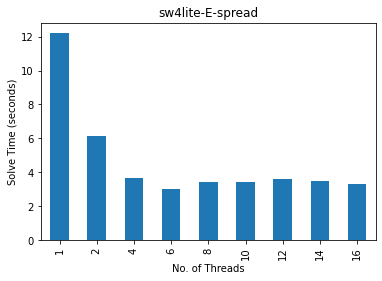

In [4]:
benchmarks = ['amg', 'gapbs_cc', 'gapbs_pr', 'minivite_x', 'NPB_bt', 'NPB_ft', 'NPB_lu', 'NPB_sp', 'STREAM', 'sw4lite']
policies = ['spread', 'close', 'P-spread', 'E-spread']
for policy in policies:
    display_results(benchmarks, f'results_07_29_2022-17_15_51/{policy}', policy)